In [52]:
import os
import random
from shutil import copyfile

import numpy as np
from tqdm import tqdm 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.datasets import mnist, cifar10
from sklearn.model_selection import train_test_split

In [50]:
path_data = '/home/ubuntu/COMP6208-AutoEncoder/several27/data/'
path_open_images = path_data + 'val_imgs/'
path_open_images_560_420 = path_data + 'open_images_560_420/'
path_open_images_560_420_train = path_data + 'open_images_560_420_train/'
path_open_images_560_420_val = path_data + 'open_images_560_420_val/'

## Get all images

In [9]:
images = []
for dir_ in os.listdir(path_open_images):
    dir_ = path_open_images + dir_
    if not os.path.isdir(dir_):
        continue
    
    for file_ in os.listdir(dir_):
        if file_.endswith('.jpg'):
            images.append(dir_ + '/' + file_)
            
len(images)

159845

In [18]:
images_sizes_count = {}
for image_path in tqdm(images):
    image_size = Image.open(image_path).size
    images_sizes_count.setdefault(image_size, 0)
    images_sizes_count[image_size] += 1

100%|██████████| 159845/159845 [00:12<00:00, 13276.99it/s]


In [21]:
max([c for s, c in images_sizes_count.items()])

44014

In [23]:
[(s, c) for s, c in images_sizes_count.items() if c == 44014]

[((560, 420), 44014)]

## Move the (560, 420) images to the same directory

In [27]:
!mkdir data/open_images_560_420

In [29]:
count = 0
for image_path in tqdm(images):
    image_size = Image.open(image_path).size
    if image_size == (560, 420):
        copyfile(image_path, path_open_images_560_420 + str(count) + '.jpg')
        count += 1

100%|██████████| 159845/159845 [00:16<00:00, 9487.60it/s]


In [35]:
last_image_count = count

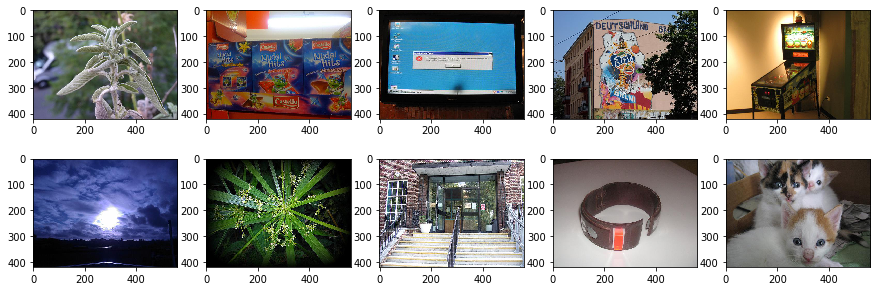

In [47]:
file_names = list(range(last_image_count))
random.shuffle(file_names)

plt.figure(figsize=(15, 5))
for i, file_i in enumerate(file_names[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.array(Image.open(path_open_images_560_420 + str(file_i) + '.jpg')))
    
plt.show()

## Split into train and val

In [48]:
!mkdir data/open_images_560_420_train

In [49]:
!mkdir data/open_images_560_420_val

In [51]:
open_images_paths = []
for file in os.listdir(path_open_images_560_420):
    if file.endswith('.jpg'):
        open_images_paths.append(path_open_images_560_420 + file)

In [55]:
open_images_paths_train, open_images_paths_val = train_test_split(open_images_paths, train_size=0.9)
len(open_images_paths_train), len(open_images_paths_val)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(39612, 4402)

In [56]:
for i, path in enumerate(open_images_paths_train):
    copyfile(path, path_open_images_560_420_train + str(i) + '.jpg')
    
for i, path in enumerate(open_images_paths_val):
    copyfile(path, path_open_images_560_420_val + str(i) + '.jpg')